In [2]:
import sys
sys.path = ['/nfs/gns/homes/willj/anaconda3/envs/GTEx/lib/python3.5/site-packages'] + sys.path
# sys.path = ['/hps/nobackup/research/stegle/users/willj/GTEx/deps/qvalue/qvalue'] + sys.path
import pickle
import math
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import pearsonr
import os
%matplotlib inline
from qvalue.qvalue import estimate as qestimate
from scipy.stats import pearsonr
import seaborn

In [4]:
tissue = 'Lung'
[X_matrix, y_pheno] = pickle.load(open('../../data/processed/association_data/expression/inception_50_-1.h5/small/{}/X_y_median'.format(tissue),'rb'))

# Distribution of activations

In [19]:
GTEx_directory = '/hps/nobackup/research/stegle/users/willj/GTEx'

(array([  1.45450000e+05,   8.63710000e+04,   4.07840000e+04,
          8.99100000e+03,   1.61100000e+03,   3.23000000e+02,
          8.60000000e+01,   2.40000000e+01,   7.00000000e+00,
          1.00000000e+00]),
 array([     0.        ,   2120.39257812,   4240.78515625,   6361.17773438,
          8481.5703125 ,  10601.96289062,  12722.35546875,  14842.74804688,
         16963.140625  ,  19083.53320312,  21203.92578125]),
 <a list of 10 Patch objects>)

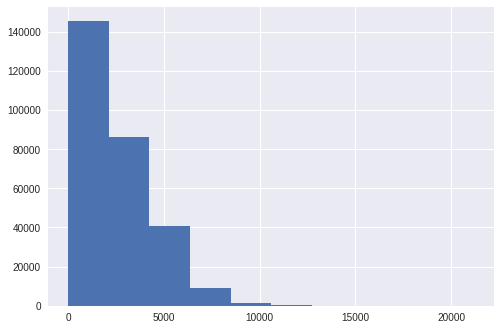

In [7]:
plt.hist(y_pheno.flatten())

# Good associations: Lung component 11

(-0.50508183, 2.4373093824766528e-19)


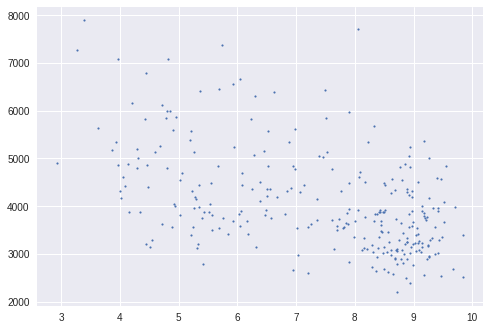

In [13]:
plt
plt.scatter(X_matrix[:,6677], y_pheno[:,11], s=3)
print (pearsonr(X_matrix[:,6677], y_pheno[:,11]))

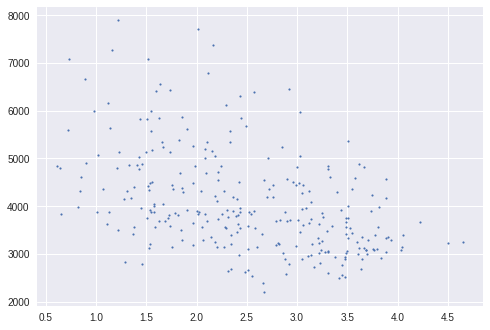

In [9]:
plt.scatter(X_matrix[:,14262], y_pheno[:,11], s=3)


(0.48539644, 8.8444419453057127e-18)


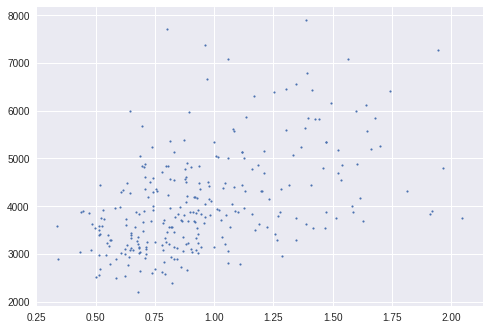

In [11]:
plt.scatter(X_matrix[:,10766], y_pheno[:,11], s=3)
print (pearsonr(X_matrix[:,10766], y_pheno[:,11]))

# Known bad associations

These are associations that I can not yet explain when aggregating via the mean.

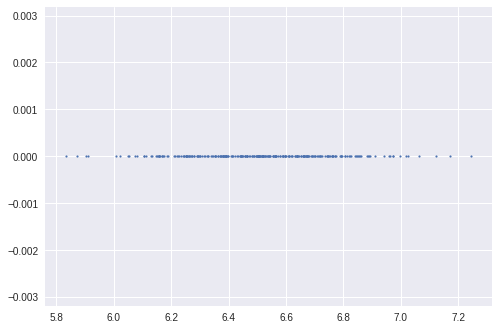

In [14]:
plt.scatter(X_matrix[:,12689], y_pheno[:,5], s=3)


# Comparing mean and median pvalues

When aggregating the representations via the mean, the shuffled pvalues are not normal. I want to check if aggregating via the median causes the pvalues to behave correctly.

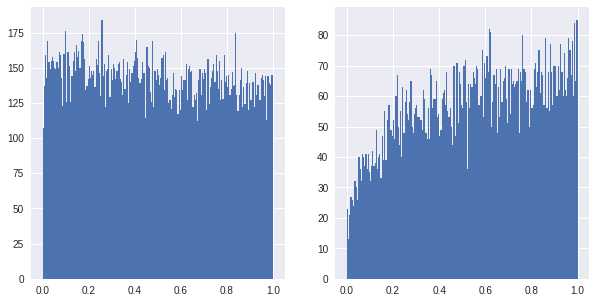

In [38]:
median_real_pvalues = pickle.load(open(GTEx_directory + '/data/processed/association_results/expression/inception_50_-1.h5/small/Lung/median/pvalues/component0_sh1_fl2.py','rb'))
mean_real_pvalues = pickle.load(open(GTEx_directory + '/data/processed/association_results/expression/inception_50_-1.h5/small/Lung/mean/pvalues/component0_sh1_fl0.py','rb'))

f, a = plt.subplots(1,2,figsize=(10,5))
a[0].hist(mean_real_pvalues[1],bins=200)
a[1].hist(median_real_pvalues[1],bins=200)
plt.show()

Something funny is going on here. However, when aggregating by the median, I filter the number of transcripts. When I use the mean, I do not filter the number of transcripts.

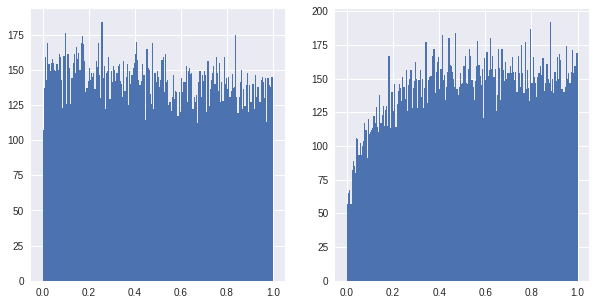

In [39]:
median_real_pvalues = pickle.load(open(GTEx_directory + '/data/processed/association_results/expression/inception_50_-1.h5/small/Lung/median/pvalues/component0_sh1_fl0.py','rb'))
mean_real_pvalues = pickle.load(open(GTEx_directory + '/data/processed/association_results/expression/inception_50_-1.h5/small/Lung/mean/pvalues/component0_sh1_fl0.py','rb'))

f, a = plt.subplots(1,2,figsize=(10,5))
a[0].hist(mean_real_pvalues[1],bins=200)
a[1].hist(median_real_pvalues[1],bins=200)
plt.show()

# Good association, Lung component 0

(-0.38186404, 4.7781112302971615e-11)


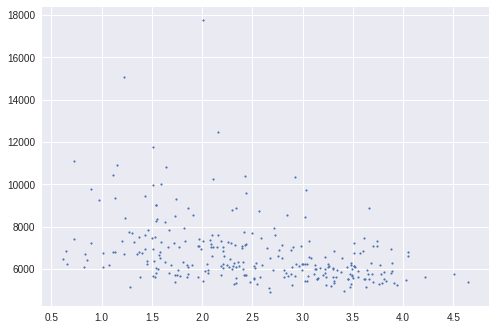

In [41]:
plt.scatter(X_matrix[:,14262], y_pheno[:,0], s=3)
print (pearsonr(X_matrix[:,14262], y_pheno[:,0]))

(-0.43850103, 1.9128688080052976e-14)


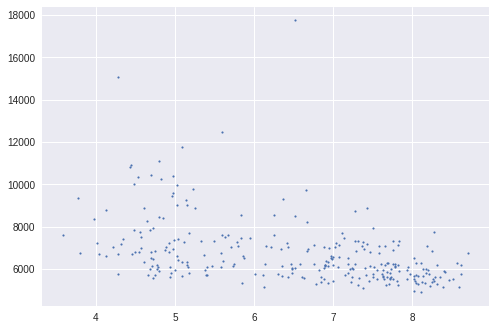

In [42]:
plt.scatter(X_matrix[:,20370], y_pheno[:,0], s=3)
print (pearsonr(X_matrix[:,20370], y_pheno[:,0]))
